<a href="https://colab.research.google.com/github/asadimtiazmalik/Plant-Disease-Detection/blob/main/Plant_Disease_Detection_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!unzip '/content/drive/MyDrive/Plant_leaf_diseases_dataset_without_augmentation.zip'

Streaming output truncated to the last 5000 lines.
  inflating: Plant_leave_diseases_dataset_without_augmentation/Tomato___Tomato_Yellow_Leaf_Curl_Virus/image (132).JPG  
  inflating: Plant_leave_diseases_dataset_without_augmentation/Tomato___Tomato_Yellow_Leaf_Curl_Virus/image (1320).JPG  
  inflating: Plant_leave_diseases_dataset_without_augmentation/Tomato___Tomato_Yellow_Leaf_Curl_Virus/image (1321).JPG  
  inflating: Plant_leave_diseases_dataset_without_augmentation/Tomato___Tomato_Yellow_Leaf_Curl_Virus/image (1322).JPG  
  inflating: Plant_leave_diseases_dataset_without_augmentation/Tomato___Tomato_Yellow_Leaf_Curl_Virus/image (1323).JPG  
  inflating: Plant_leave_diseases_dataset_without_augmentation/Tomato___Tomato_Yellow_Leaf_Curl_Virus/image (1324).JPG  
  inflating: Plant_leave_diseases_dataset_without_augmentation/Tomato___Tomato_Yellow_Leaf_Curl_Virus/image (1325).JPG  
  inflating: Plant_leave_diseases_dataset_without_augmentation/Tomato___Tomato_Yellow_Leaf_Curl_Virus/i

In [2]:
# Python Libraries 
import os 
from os import listdir 
import numpy as np
import matplotlib.pyplot as plt

# Pytorch Libraries
import torch
from torchvision import transforms as T
from torchvision.datasets import ImageFolder
from torchvision.utils import make_grid
from torch.utils.data import random_split
from tqdm.notebook import tqdm
import torchvision.models as models


In [3]:
data_dir = '/content/Plant_leave_diseases_dataset_without_augmentation'

In [4]:
classes = [filename for filename in listdir(data_dir)]
print(classes)
print(len(classes))

['Peach___healthy', 'Corn___Common_rust', 'Raspberry___healthy', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Bacterial_spot', 'Grape___healthy', 'Tomato___Late_blight', 'Blueberry___healthy', 'Peach___Bacterial_spot', 'Apple___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Tomato___healthy', 'Apple___Apple_scab', 'Corn___healthy', 'Cherry___Powdery_mildew', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Apple___Black_rot', 'Grape___Esca_(Black_Measles)', 'Tomato___Tomato_mosaic_virus', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Corn___Cercospora_leaf_spot Gray_leaf_spot', 'Pepper,_bell___Bacterial_spot', 'Tomato___Early_blight', 'Potato___healthy', 'Background_without_leaves', 'Cherry___healthy', 'Apple___Cedar_apple_rust', 'Tomato___Leaf_Mold', 'Strawberry___healthy', 'Pepper,_bell___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Corn___Northern_Leaf_Blight', 'Tomato___Septoria_leaf_spot', 'Grape___Black_rot', 'Strawberry___Leaf_scorch', 'Soybean___

In [5]:
total_imgs = 0
for filename in classes:
  total_imgs += len(listdir(os.path.join(data_dir, filename)))
  print("Number of images in {}: {}".format(filename, len(listdir(os.path.join(data_dir, filename)))))
print("Total Number of images in the Dataset are: ", total_imgs)

Number of images in Peach___healthy: 360
Number of images in Corn___Common_rust: 1192
Number of images in Raspberry___healthy: 371
Number of images in Tomato___Spider_mites Two-spotted_spider_mite: 1676
Number of images in Tomato___Bacterial_spot: 2127
Number of images in Grape___healthy: 423
Number of images in Tomato___Late_blight: 1909
Number of images in Blueberry___healthy: 1502
Number of images in Peach___Bacterial_spot: 2297
Number of images in Apple___healthy: 1645
Number of images in Potato___Early_blight: 1000
Number of images in Potato___Late_blight: 1000
Number of images in Tomato___healthy: 1591
Number of images in Apple___Apple_scab: 630
Number of images in Corn___healthy: 1162
Number of images in Cherry___Powdery_mildew: 1052
Number of images in Tomato___Tomato_Yellow_Leaf_Curl_Virus: 5357
Number of images in Apple___Black_rot: 621
Number of images in Grape___Esca_(Black_Measles): 1383
Number of images in Tomato___Tomato_mosaic_virus: 373
Number of images in Grape___Leaf

In [4]:
imagenet_stats = ([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])

train_tfms = T.Compose([
    T.Resize(256), 
    T.RandomCrop(272, padding=8, padding_mode='reflect'),
    T.RandomResizedCrop(256, scale=(0.5,0.9), ratio=(1, 1)), 
    T.ColorJitter(brightness=0.1, contrast=0.1, saturation=0.1, hue=0.1),
    T.RandomHorizontalFlip(), 
    T.RandomRotation(45),
    T.ToTensor(), 
    T.Normalize(*imagenet_stats,inplace=True), 
    T.RandomErasing(inplace=True)
])

valid_tfms = T.Compose([
    T.Resize(256), 
    T.ToTensor(), 
#     T.Normalize(*imagenet_stats)
])

In [5]:
dataset = ImageFolder(data_dir, transform=train_tfms)

In [6]:
def show_example(img, label):
    print('Label: ', dataset.classes[label], "("+str(label)+")")
    plt.imshow(img.permute(2,1,0))
  

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Label:  Apple___healthy (3)


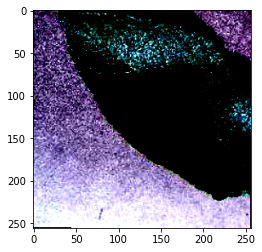

In [30]:
show_example(*dataset[2500])

In [7]:
random_seed = 42
torch.manual_seed(random_seed);

In [8]:
# 80-20 split of the training data into train and validation sets 
val_size = 10000

# Size of the train data
train_size = len(dataset) - val_size 

train_ds, val_ds = random_split(dataset, [train_size, val_size])
len(train_ds), len(val_ds)

(45448, 10000)

In [9]:
from torch.utils.data.dataloader import DataLoader

batch_size = 64

In [10]:
train_dl = DataLoader(train_ds, batch_size, shuffle=True, num_workers=0, pin_memory=True)
val_dl = DataLoader(val_ds, batch_size*2, num_workers=0, pin_memory=True)

In [11]:
def show_batch(dl, invert=True):
    for images, labels in dl:
        fig, ax = plt.subplots(figsize=(16, 8))
        ax.set_xticks([]); ax.set_yticks([])
        data = 1-images if invert else images
        ax.imshow(make_grid(data, nrow=16).permute(1, 2, 0))
        break

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


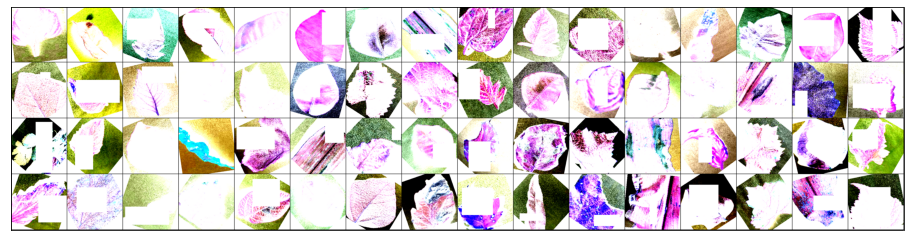

In [38]:
show_batch(train_dl, invert=True)

In [12]:
import torch.nn as nn
import torch.nn.functional as F

In [13]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [14]:
class ImageClassificationBase(nn.Module):
    def training_step(self, batch):
        images, targets = batch 
        out = self(images)                      
        loss = F.cross_entropy(out, targets)      
        return loss
    
    def validation_step(self, batch):
        images, targets = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, targets)  # Calculate loss
        acc = accuracy(out, targets)
        return {'val_loss': loss.detach(), 'val_acc': acc }
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_acc = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_acc).mean()       # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], last_lr: {:.4f}, train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['lrs'][-1], result['train_loss'], result['val_loss'], result['val_acc']))

In [15]:
class Resnet(ImageClassificationBase):
    def __init__(self):
        super().__init__()
        # Use a pretrained model
        self.network = models.resnet34(pretrained=True)
        # Replace last layer
        num_ftrs = self.network.fc.in_features
        self.network.fc = nn.Linear(num_ftrs, 39)
        
    
    def forward(self, xb):
        return torch.sigmoid(self.network(xb))
    
    def freeze(self):
        # To freeze the residual layers
        for param in self.network.parameters():
            param.require_grad = False
        for param in self.network.fc.parameters():
            param.require_grad = True
    
    def unfreeze(self):
        # Unfreeze all layers
        for param in self.network.parameters():
            param.require_grad = True

In [16]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
    
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

In [17]:
device = get_default_device()
device

device(type='cuda')

In [18]:
train_dl = DeviceDataLoader(train_dl, device)
val_dl = DeviceDataLoader(val_dl, device)

In [19]:
@torch.no_grad()
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def get_lr(optimizer):
    for param_group in optimizer.param_groups:
        return param_group['lr']

def fit_one_cycle(epochs, max_lr, model, train_loader, val_loader, 
                  weight_decay=0, grad_clip=None, opt_func=torch.optim.SGD):
    torch.cuda.empty_cache()
    history = []
    
    # Set up cutom optimizer with weight decay
    optimizer = opt_func(model.parameters(), max_lr, weight_decay=weight_decay)
    # Set up one-cycle learning rate scheduler
    sched = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr, epochs=epochs, 
                                                steps_per_epoch=len(train_loader))
    
    for epoch in range(epochs):
        # Training Phase 
        model.train()
        train_losses = []
        lrs = []
        for batch in tqdm(train_loader):
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            
            # Gradient clipping
            if grad_clip: 
                nn.utils.clip_grad_value_(model.parameters(), grad_clip)
            
            optimizer.step()
            optimizer.zero_grad()
            
            # Record & update learning rate
            lrs.append(get_lr(optimizer))
            sched.step()
        
        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        result['lrs'] = lrs
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [20]:
model = to_device(Resnet(), device)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


In [21]:
model.freeze()

In [22]:
epochs = 5
max_lr = 1e-3
opt_func = torch.optim.Adam

In [23]:
history = fit_one_cycle(epochs, max_lr, model, train_dl, val_dl, 
                         opt_func=opt_func)


Epoch [0], last_lr: 0.0008, train_loss: 2.8822, val_loss: 2.9732, val_acc: 0.5261



Epoch [1], last_lr: 0.0010, train_loss: 2.7833, val_loss: 2.8214, val_acc: 0.7811



Epoch [2], last_lr: 0.0006, train_loss: 2.7537, val_loss: 2.7341, val_acc: 0.9322



Epoch [3], last_lr: 0.0002, train_loss: 2.7297, val_loss: 2.7181, val_acc: 0.9686



Epoch [4], last_lr: 0.0000, train_loss: 2.7189, val_loss: 2.7151, val_acc: 0.9758
